# Data Analysis

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from numpy import sqrt, abs, round
from scipy.stats import t as t_dist
from numpy import sqrt, abs, round
from scipy.stats import norm
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
data = pd.read_csv('data.csv')
data

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


In [3]:
#first 10 instances of the data
data.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
5,ACUTYTWS,Male,56,RG261,Self_Employed,X1,32,No,544163,Yes,0
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,NaN,1056750,Yes,1
7,JJNJUQMQ,Female,48,RG265,Self_Employed,X3,13,No,444724,Yes,0
8,ZMQFYKCB,Female,40,RG283,Self_Employed,X2,38,No,1274284,No,0
9,NVKTFBA2,Female,55,RG268,Self_Employed,X2,49,Yes,2014239,No,0


In [4]:
print('This data is composed of: \n', '\033[1m -', (data.dtypes == 'int64').sum(), '\033[0m', 
      'Integer variables \n', '\033[1m -', (data.dtypes == 'object').sum(), '\033[0m', 'Object vaiables\n', 'where one refers to the customer id ans Is_Lead is the target variable with 10 independent varaibles')

This data is composed of: 
  - 4  Integer variables 
  - 7  Object vaiables
 where one refers to the customer id ans Is_Lead is the target variable with 10 independent varaibles


In [5]:
(data.isnull().sum()/data.shape[0])*100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

* There are almost 12% null values in the Credit_Product variable

## Missing value treatment

In [6]:
data['Credit_Product'].fillna(data['Credit_Product'].mode()[0], inplace = True)

In [7]:
(data.isnull().sum()/data.shape[0])*100

ID                     0.0
Gender                 0.0
Age                    0.0
Region_Code            0.0
Occupation             0.0
Channel_Code           0.0
Vintage                0.0
Credit_Product         0.0
Avg_Account_Balance    0.0
Is_Active              0.0
Is_Lead                0.0
dtype: float64

* Now we have no missing values in our dataset

## Typecasting

In [8]:
print('This data is composed of: \n', '\033[1m -', (data.dtypes == 'int64').sum(), '\033[0m', 
      'Integer variables \n', '\033[1m -', (data.dtypes == 'object').sum(), '\033[0m', 'Object vaiables')

This data is composed of: 
  - 4  Integer variables 
  - 7  Object vaiables


In [9]:
# Finding out the integers variables
data.dtypes[data.dtypes == 'int64']

Age                    int64
Vintage                int64
Avg_Account_Balance    int64
Is_Lead                int64
dtype: object

Is_lead means whether the customer is a interested in the credit card or not so it comes us categorical data type and not integer

In [10]:
# Finding out the object variables
data.dtypes[data.dtypes == 'object']

ID                object
Gender            object
Region_Code       object
Occupation        object
Channel_Code      object
Credit_Product    object
Is_Active         object
dtype: object

In [11]:
#Typecasting the object variables to categoriy
data['ID'] = data['ID'].astype('category')
data['Gender'] = data['Gender'].astype('category')
data['Region_Code'] = data['Region_Code'].astype('category')
data['Occupation'] = data['Occupation'].astype('category')
data['Channel_Code'] = data['Channel_Code'].astype('category')
data['Credit_Product'] = data['Credit_Product'].astype('category')
data['Is_Active'] = data['Is_Active'].astype('category')
data['Is_Lead'] = data['Is_Lead'].astype('category')

In [12]:
data.dtypes

ID                     category
Gender                 category
Age                       int64
Region_Code            category
Occupation             category
Channel_Code           category
Vintage                   int64
Credit_Product         category
Avg_Account_Balance       int64
Is_Active              category
Is_Lead                category
dtype: object

# 1. Univariate Analysis

## 1.1 Numerical Variable

In [13]:
numerical = data.select_dtypes(include=['int64'])
numerical.dtypes

Age                    int64
Vintage                int64
Avg_Account_Balance    int64
dtype: object

In [14]:
for i in numerical.columns:
    print(f'range of {i}:[{data[i].min()}, {data[i].max()}]')

range of Age:[23, 85]
range of Vintage:[7, 135]
range of Avg_Account_Balance:[20790, 10352009]


In [15]:
def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

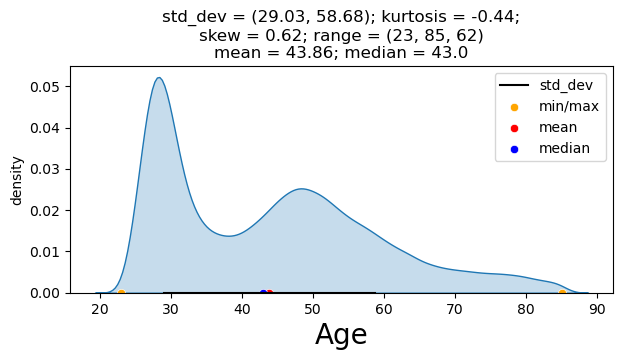

In [16]:
UVA_numeric(data,['Age'])

* mean age = 43.86
* median age = 43
* negligible difference between mean and median
* there are more young customers in our dataset ranging between 23 to 50
* skewness = 0.62 which means we have less old customers in our data
* kurtosis = -0.44, outliers are less likely to be present mostly very old customers that are few in number

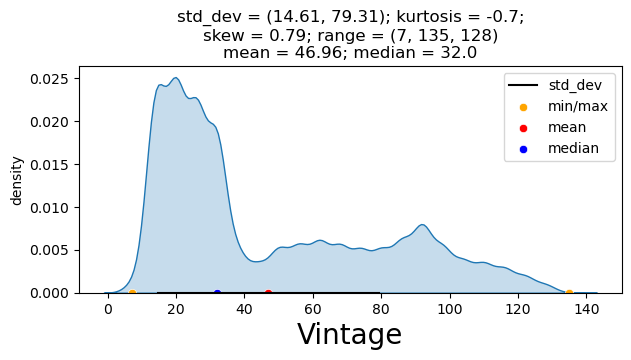

In [17]:
UVA_numeric(data,['Vintage'])

* most customers have vintage between 7 to 45 months
* skewness = 0.79 that means it is biased towards new customers
* kurtosis = -0.7 very less chance of extreme values or outliers

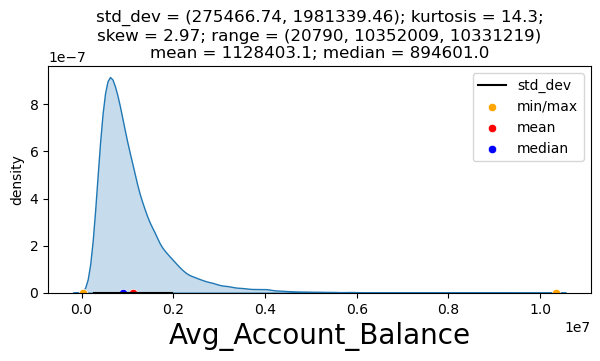

In [18]:
UVA_numeric(data,['Avg_Account_Balance'])

* most of the value range between
* the graph is skewed towards right with skweness on 2.97
* kurtosis is very high hence extreme values and outliers will be present in this variable.

In [19]:
def UVA_boxplot(data, var_group, include_outlier = True):
  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  from scipy import stats
  for j,i in enumerate(var_group):
   
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)
    skew = data[i].skew()
    mini = data[i].min()
    maxi = data[i].max()
    kurt = data[i].kurtosis()
    shapiro_test = stats.shapiro(data[i])
    
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])
    
    plt.subplot(1,size,j+1)
    sns.boxplot(data[i], orient="v")
    plt.ylabel('{}'.format(i))
    plt.title('Skew = {}; Range = {} \n 1st, 2nd, 3rd  quartile = {};\n Whiskers = {}; kurtosis = {} ; \n Number of Outlier (low/high) = {} '.format(
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2)),
                                                                                                   (round(quant25,2),round(med,2),round(quant75,2)),
                                                                                                   (round(whis_low,2), round(whis_high,2)), 
                                                                                                   (round(kurt,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))


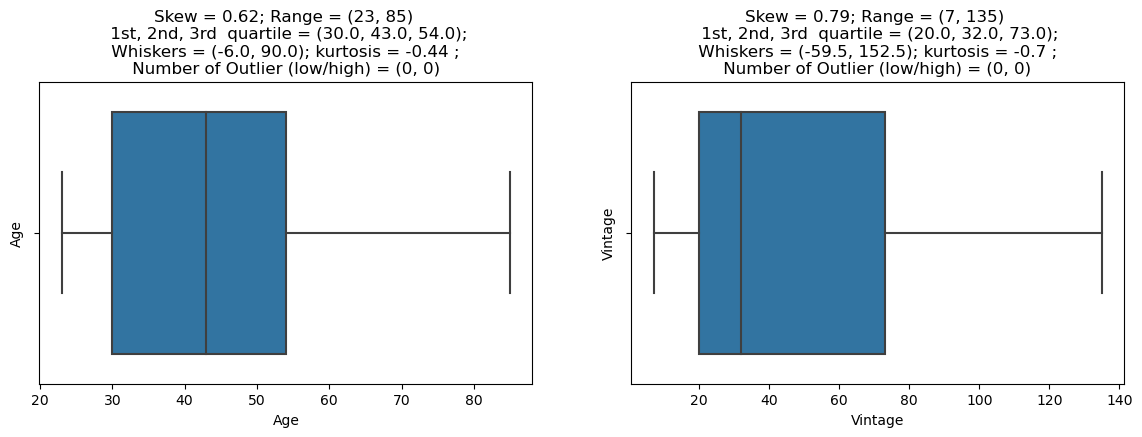

In [20]:
UVA_boxplot(data,['Age','Vintage'])

* There are no outliers in Age and Vintage variable in our dataset

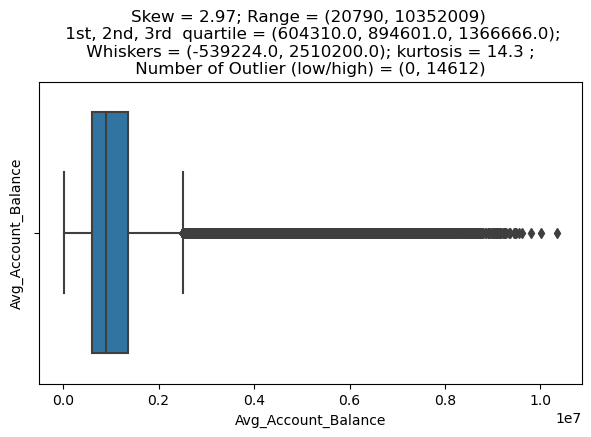

In [21]:
UVA_boxplot(data,['Avg_Account_Balance'])

* There are outliers in this variable mostly higher account balance of some customers or entrepreneur maybe the reason for this

## 1.2 Categorical Variables

In [22]:
data.select_dtypes(include = [ 'category']).dtypes

ID                category
Gender            category
Region_Code       category
Occupation        category
Channel_Code      category
Credit_Product    category
Is_Active         category
Is_Lead           category
dtype: object

In [23]:
def UVA_category(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (7*size,7), dpi = 100)
    
  for j,i in enumerate(var_group):
    norm_count = round(data[i].value_counts(normalize = True)*100,2)
    n_uni = data[i].nunique()
    sns.set_style('darkgrid')
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

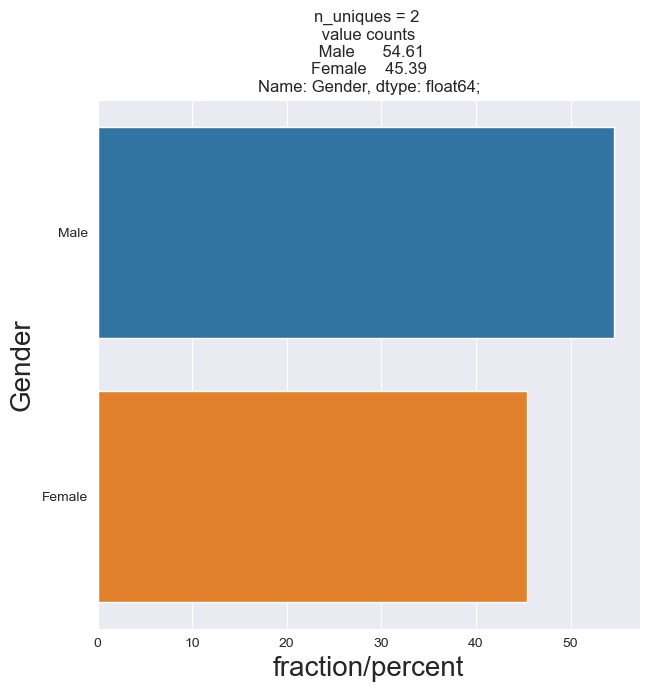

In [24]:
UVA_category(data,['Gender'])

* there are more number of male's than female's in our dataset


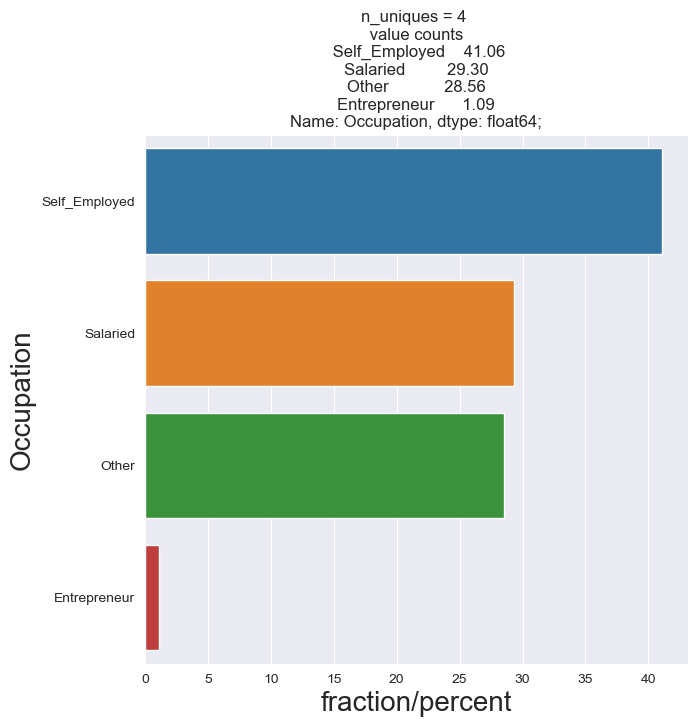

In [25]:
UVA_category(data, [ 'Occupation'])

* 40% of customers are self employed and only 1% customers are entrepreneur

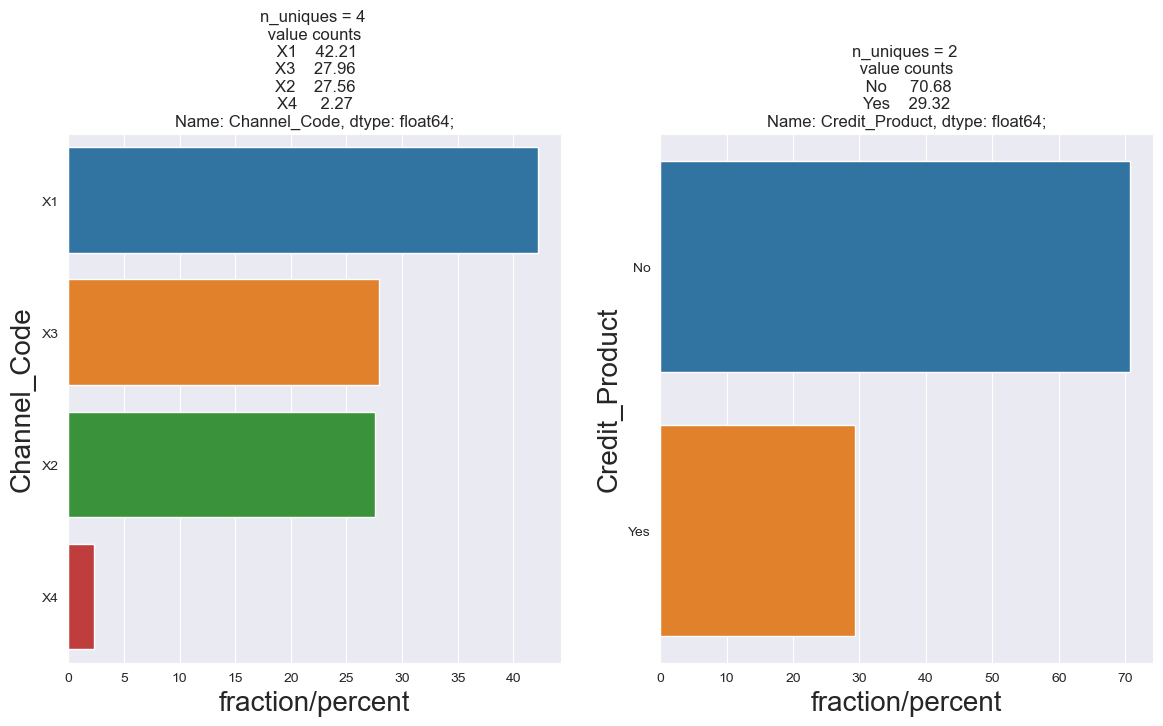

In [26]:
UVA_category(data, [ 'Channel_Code', 'Credit_Product'])

* x1 is the most occuring channel code with 42% occurance
* x4 is the least with 2% occurance

### credit product
* most of the customer have no active products maybe that's why chances of them taking these credit cards 
* there are null values in this variable that we need to impute

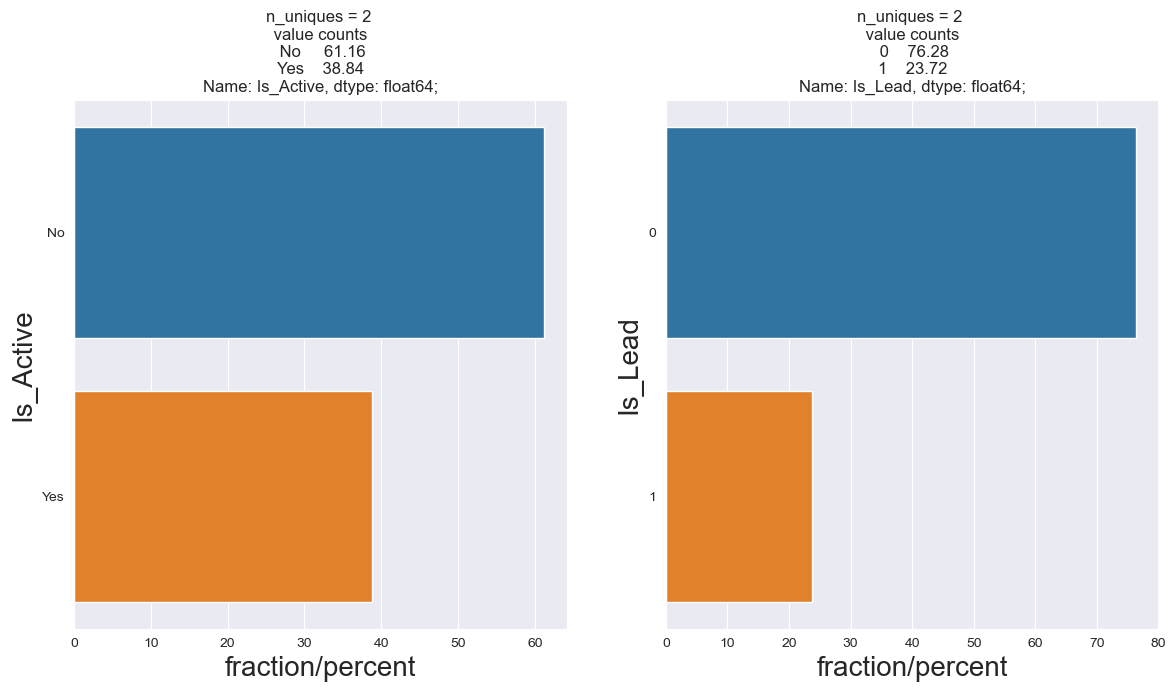

In [27]:
UVA_category(data, [ 'Is_Active', 'Is_Lead'])

* 61% customers are not active in the last 3 months, cross selling them may be difficult

### is_lead
* 76% of customers in our data are not interested in the credit card

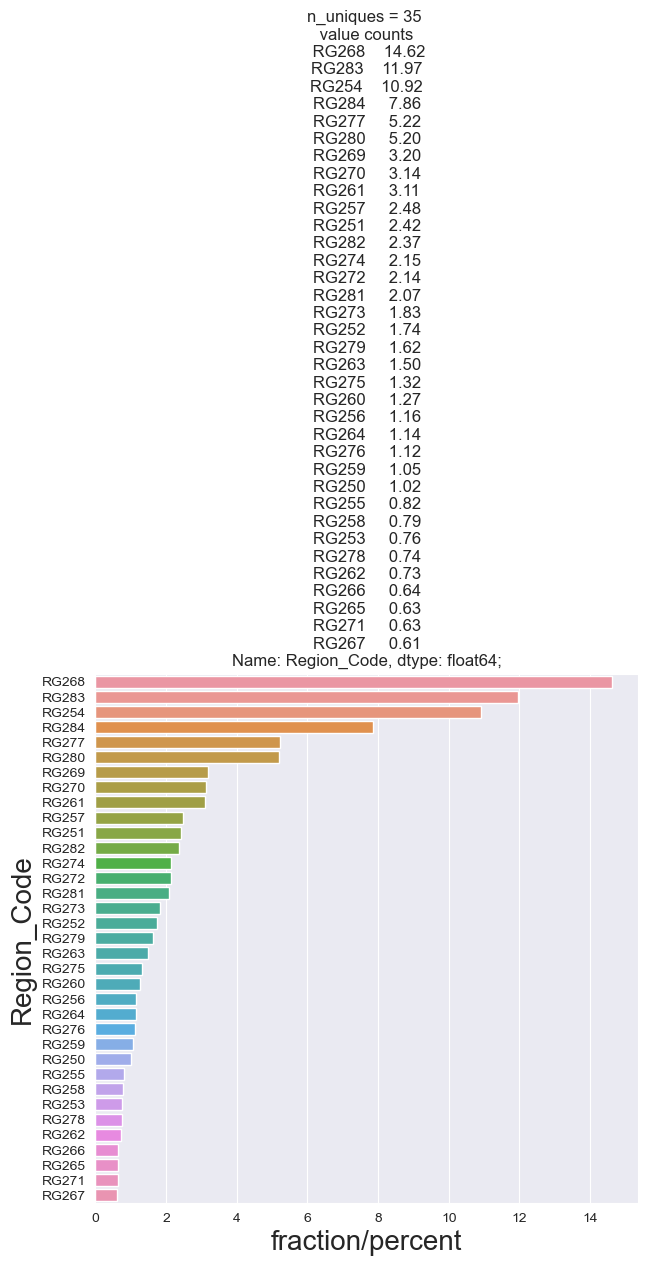

In [28]:
UVA_category(data, [ 'Region_Code'])

###### In order to have a better view of our data, we will categorize some numerical variables so that we can have a view similar to the one we made above.

In [29]:
bins = [20, 45, 60, 75, 90]
labels = ['20-44','45-59', '60-74', '75+']
data['age_ranges'] = pd.cut(data.Age, bins, labels = labels,include_lowest = True)

bins = [7,35,70,105,140]
labels = ['7-39','40-79', '80-109', '110-140']
data['vintage_months'] = pd.cut(data.Vintage, bins, labels = labels,include_lowest = True)

bins = [100000,1000000, 5000000,10000000]
labels = ['low balance','medium balance','high balance']
data['balance_status'] = pd.cut(data.Avg_Account_Balance, bins, labels = labels,include_lowest = True)


data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,age_ranges,vintage_months,balance_status
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0,60-74,40-79,medium balance
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0,20-44,7-39,low balance
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,45-59,7-39,medium balance
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0,20-44,7-39,low balance
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0,20-44,7-39,low balance


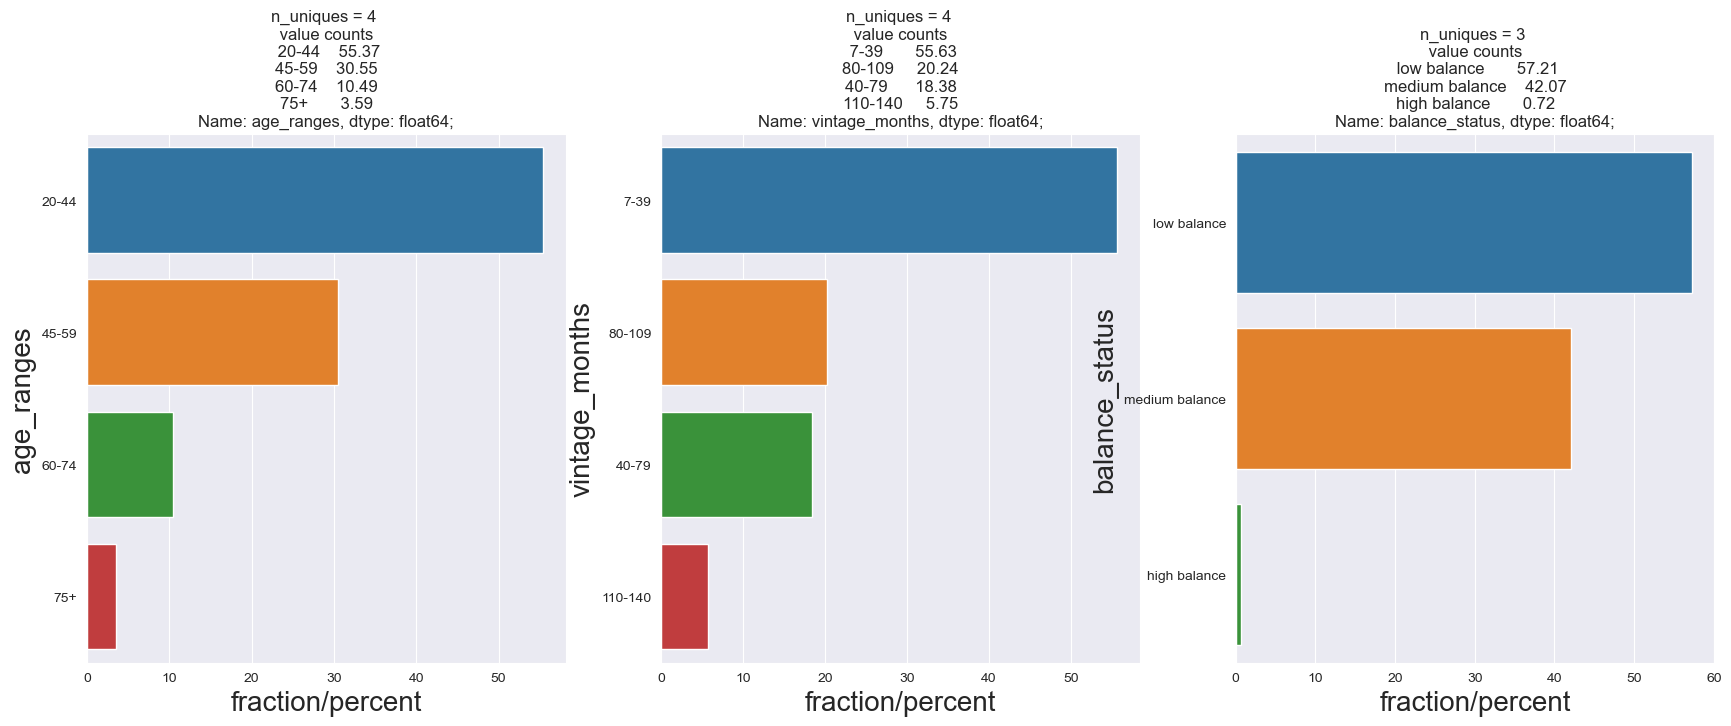

In [30]:
UVA_category(data, ['age_ranges', 'vintage_months', 'balance_status' ])  

# 2. Bivariate Analysis

## 2.1 Numerical - Numerical

In [31]:
# calculating correlation
correlation = numerical.corr()
correlation

,Age,Vintage,Avg_Account_Balance
Age,1.000000,0.631242,0.145232
Vintage,0.631242,1.000000,0.167433
Avg_Account_Balance,0.145232,0.167433,1.000000


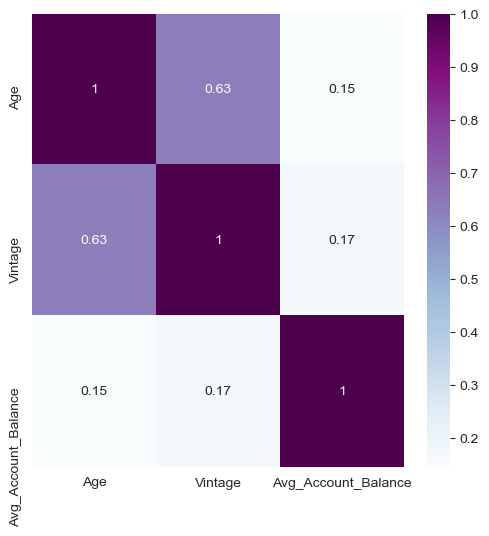

In [32]:
plt.figure(figsize=(6,6), dpi =100)
ax = sns.heatmap(correlation, cmap='BuPu', annot=True)
plt.show()

* There is high positive correlation between Age and Vintage
* There is almost 0 or negligible correlation between Age and Average_account_balance
* There is almost 0 or negligible correlation between Vintage and Average_account_balance

<Figure size 840x560 with 0 Axes>

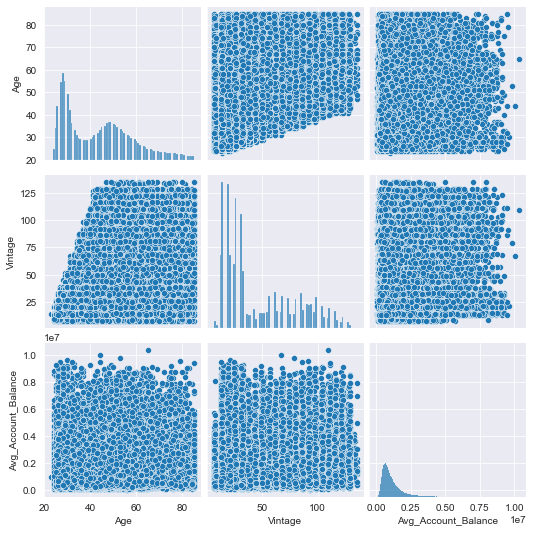

In [33]:
plt.figure(dpi=140)
sns.pairplot(data = data)

<AxesSubplot:xlabel='Age', ylabel='Vintage'>

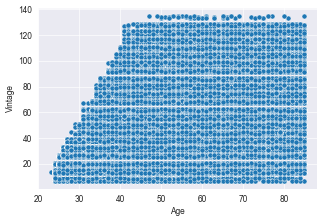

In [34]:
plt.figure(dpi=60)
sns.scatterplot(numerical['Age'], numerical['Vintage'])

* from this graph we can see there is some linear relationship between Age and Vintage

## 2.2 Categorical - Categorical

### List of hypothesis to check
* Does gender have any significant impact on generating lead
* Do male customers more likely to reject the credit card offer than female
* Does occupation have a significant impact on lead generation
* Customers having active credit product reject the offer?
* Do active customers in last 3 months have any significant impact on lead generation
* Customers not active in last 3 months have stopped using our products?
* Does age range of customers have significant impact on lead generation
* Do customers with age range 40-60 have high chance of accepting the plan
* Does vintage have significant impact on lead generation
* Does balance of customer have significant impact on lead generation
* Do people with higher balance accept the plan

In [35]:
def BVA_categorical_plot(data, tar, cat):

  data = data[[cat,tar]][:]

  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  chi, p, dof, expected = chi2_contingency(f_obs)

  if p<0.05:
    sig = True
  else:
    sig = False

  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n Chi-square = {}".format(round(p,5),sig,round(chi,2)))

  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()*100
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()

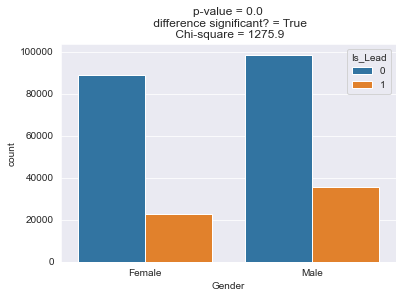

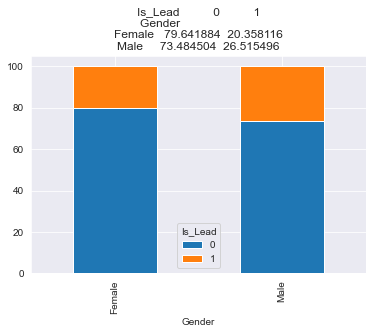

In [36]:
BVA_categorical_plot(data, 'Is_Lead','Gender')

* By the p_value and chi_squared test we can see that the difference between the male and female customer accpeting the lead is significant
* By the frequency we can see the male are more likely to accept the lead(plan)

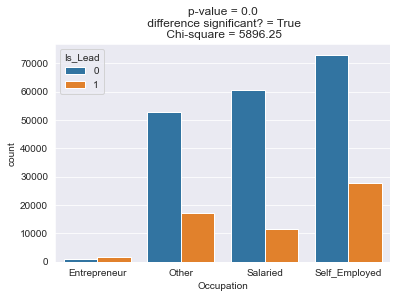

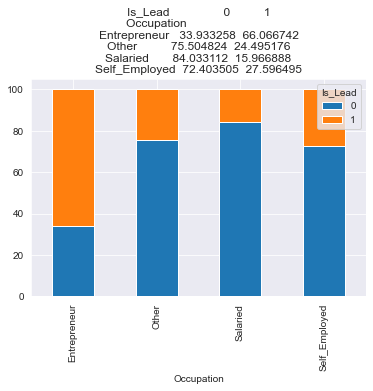

In [37]:
BVA_categorical_plot(data, 'Is_Lead','Occupation')

* By the p_value and chi_squared test we can see that occupation plays a significant role in lead generation
* We can see that Entrepreneur is the only category in occupation where interested cutomers is almost 2X than rejecting it
* Salaried customers prefer most not to take credit card
* Chances of accpetance is also very less in self_employed customers

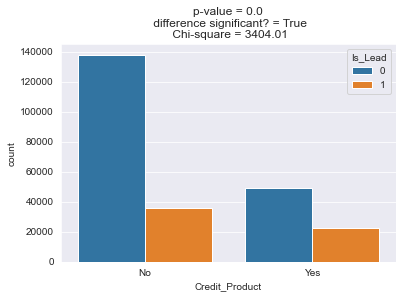

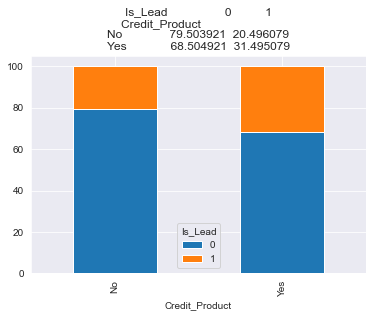

In [38]:
BVA_categorical_plot(data, 'Is_Lead','Credit_Product')

* By the p_value and chi_squared test we can see credit_product plays a significant role in lead generation
* People already having active credit_product accept the lead(plan) more than people who don't have any credit_product

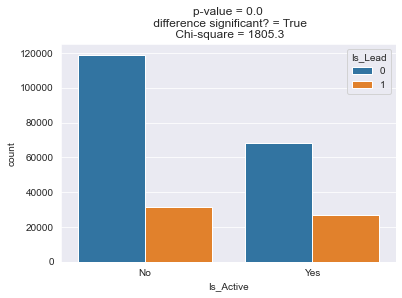

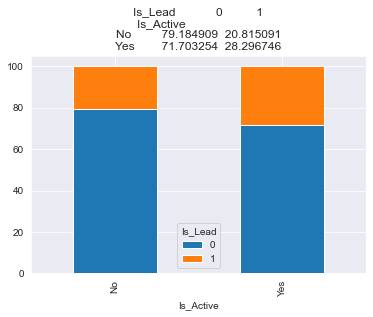

In [39]:
BVA_categorical_plot(data, 'Is_Lead','Is_Active')

* By the p_value and chi_squared test we can see active_customers plays a significant role in lead generation
* Active customers are highly likely to accpet the plan than inactive customers

In [40]:
## binning variables plotting left

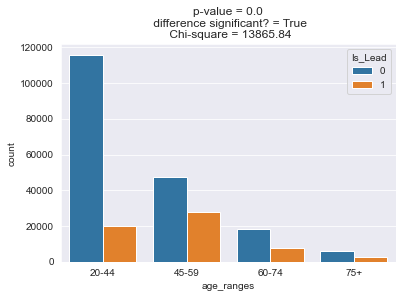

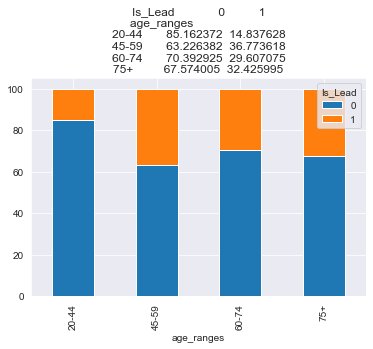

In [41]:
BVA_categorical_plot(data, 'Is_Lead','age_ranges')

* By the p_value and chi_squared test we can see age range of customers plays a significant role in lead generation
* Age range between 45-60 arethe customer most interested followed by people with 75+ years of age

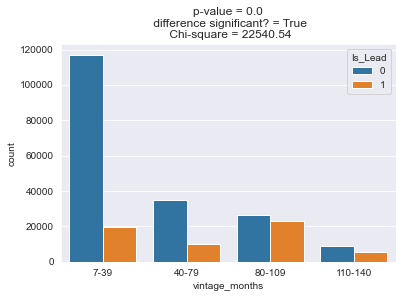

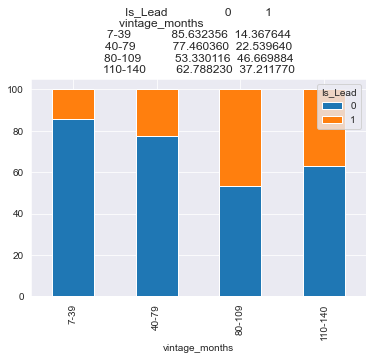

In [42]:
BVA_categorical_plot(data, 'Is_Lead','vintage_months')

* By the p_value and chi_squared test we can see that vintage in months play a significant role in lead generation
* Customers associated with the bank for more than 80 months accept the plan
* New customer are not likely to opt for the plan

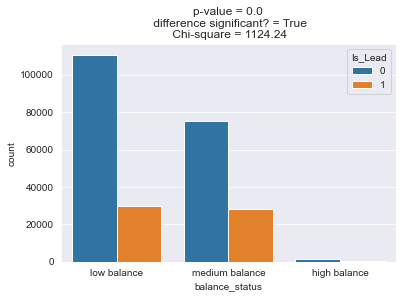

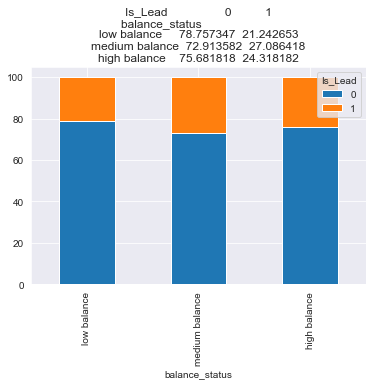

In [43]:
BVA_categorical_plot(data, 'Is_Lead','balance_status')

* By the p_value and chi_squared test we can see that balance status of customers play a significant role in lead generation

## 2.3 Categorical - Numerical

## List of hypothesis to check
* Are average age of existing customers equal to that of lead generating(Target) of customers?
* Are young customer high likely to accept the lead?
* Are the average Vintage of customers equal to that of lead generating (Target) customers?
* Are the average account balance of existing customers equal to that of lead generating(Target) customers?
* Are customers with higher account balance highly likely to accept the deal
* Are the customers with higher vintage highly likely to accept the deal?

In [44]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval
'''''
Testing if they are equal or not. If p_value < 0.05 we reject the null hypothesis
'''''

def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval
'''''
Testing if they are equal or not. If p_value < 0.05 we reject the null hypothesis
'''''

def Bivariate_cont_cat(data, cont, cat, category):
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  t_p_val = round(TwoSampT(m1, m2, std1, std2, n1, n2),4)
  z_p_val = round(TwoSampZ(m1, m2, std1, std2, n1, n2),4)
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)
  table = round(table,2)
  plt.figure(figsize = (15,6), dpi=140)
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val, z_p_val, table))
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')

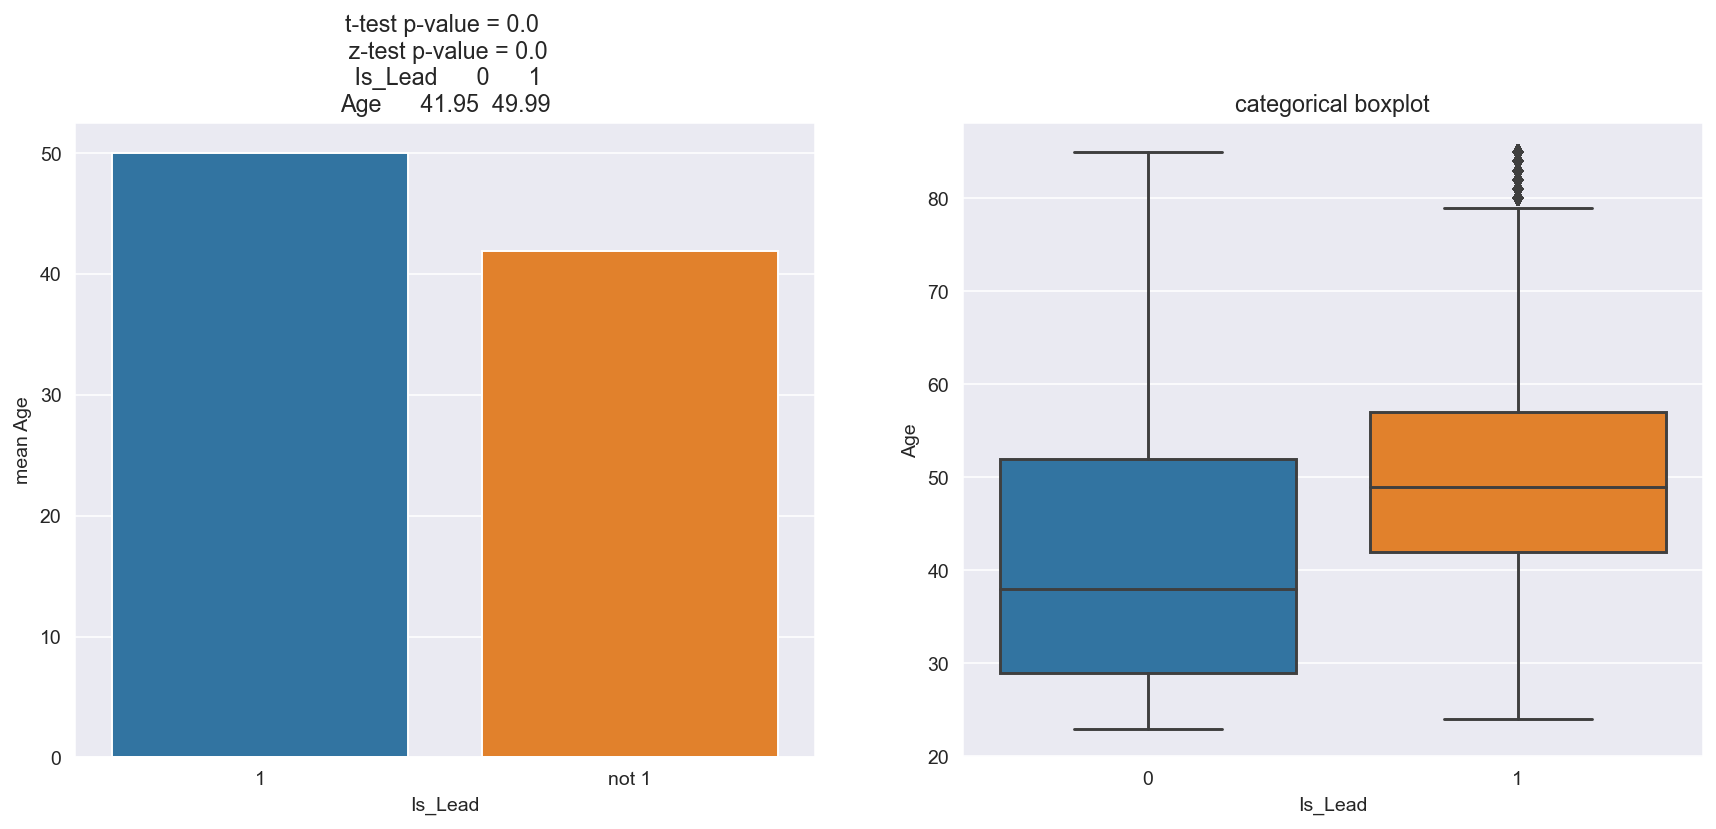

In [45]:
Bivariate_cont_cat(data, 'Age','Is_Lead',1)

* There is significant difference between  average age of customers accpeting the plan and rejecting the plan


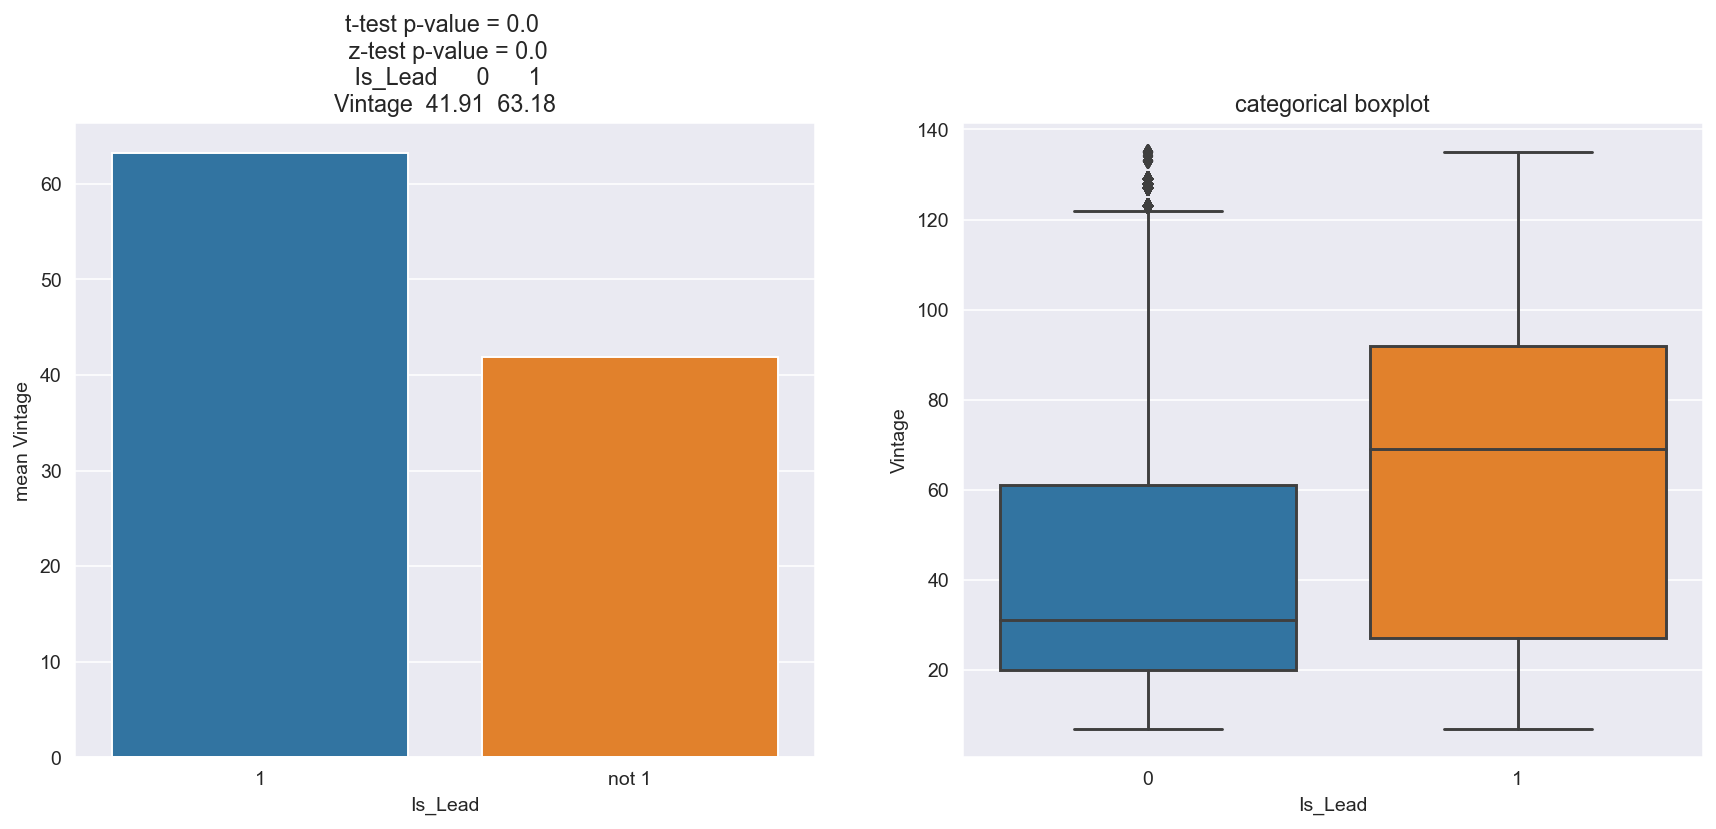

In [46]:
Bivariate_cont_cat(data, 'Vintage', 'Is_Lead',1)

* There is significant difference between average vintage of interested and not interested customers
* Customers with less vintage seem to be highly interested in the plan

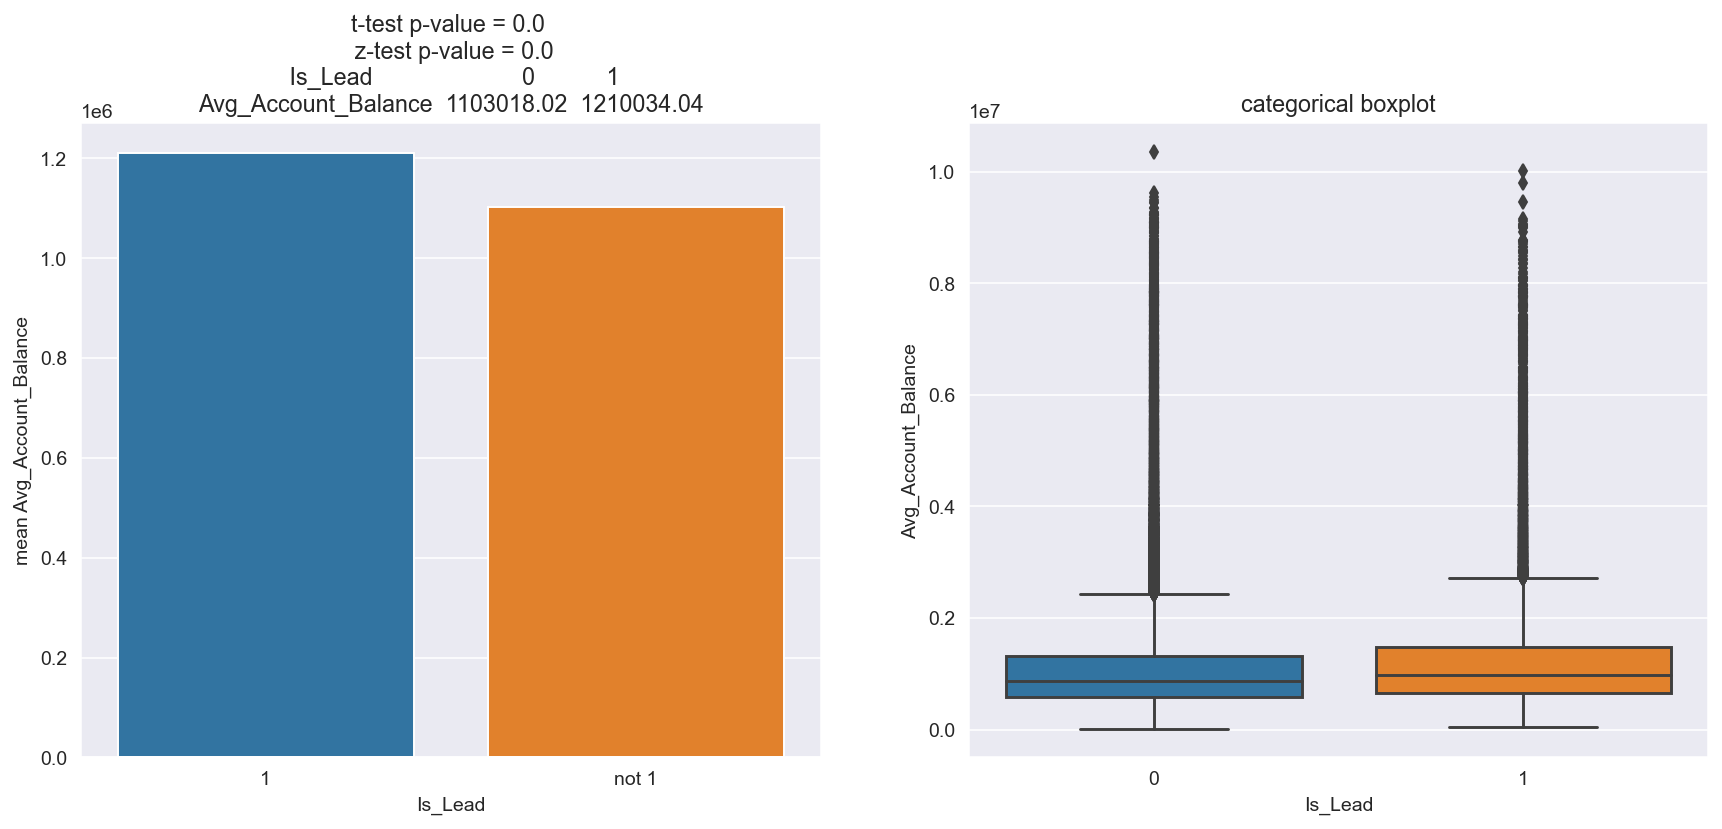

In [47]:
Bivariate_cont_cat(data, 'Avg_Account_Balance', 'Is_Lead',1)

* There is significant difference between average account balance of interested and not interested customers
* We can see that customers with high average_account_balance is more likely to be interested in the plan

# 3 Multivariate Analysis

In [48]:
Target_variable=data["Is_Lead"].isin([1])
new_data=data[Target_variable]
new_data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,age_ranges,vintage_months,balance_status
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,No,1056750,Yes,1,60-74,7-39,medium balance
15,UJ2NJKKL,Male,33,RG268,Self_Employed,X2,69,No,517063,Yes,1,20-44,40-79,low balance
16,CNGSPYWS,Female,46,RG268,Other,X3,97,Yes,2282502,No,1,45-59,80-109,medium balance
17,VH7NBNNQ,Female,59,RG283,Other,X3,15,Yes,2384692,No,1,45-59,7-39,medium balance
20,7PMYNWB3,Male,44,RG269,Self_Employed,X2,19,Yes,1001650,No,1,20-44,7-39,medium balance


In [49]:
new_data.pivot_table('Is_Lead', ['Gender', 'age_ranges'], 'balance_status', aggfunc='count')

balance_status     low balance  medium balance  high balance
Gender age_ranges                                           
Female 20-44              5627            3524            59
       45-59              4472            5441            79
       60-74               943            1409            27
       75+                 530             578            12
Male   20-44              6652            4249            67
       45-59              8655            8844           114
       60-74              2260            2942            52
       75+                 715            1006            18

*  customers(age ranging between 45-59) both male and female having low and medium balance are more interested


In [50]:
new_data.pivot_table('Is_Lead', ['Gender', 'age_ranges'], ['Occupation','vintage_months'] , aggfunc='count')

Occupation        Entrepreneur                      Other               \
vintage_months            7-39 40-79 80-109 110-140  7-39 40-79 80-109   
Gender age_ranges                                                        
Female 20-44                45    65     62       2   891   248    217   
       45-59                65    87    234      91   338   374    962   
       60-74                 0     0      0       0   310   395   1019   
       75+                   0     0      0       0   139   206    667   
Male   20-44                75    87    103       6   989   285    257   
       45-59                99   129    450     162   565   567   1720   
       60-74                 0     0      0       0   507   654   2291   
       75+                   0     0      0       0   129   281   1107   

Occupation                Salaried                      Self_Employed        \
vintage_months    110-140     7-39 40-79 80-109 110-140          7-39 40-79   
Gender age_ranges                                                             
Female 20-44            4     3420   230    167      24          2105   921   
       45-59          255      152   213    499     121          1277  1289   
       60-74          207       52    59    114      32            34    37   
       75+            108        0     0      0       0             0     0   
Male   20-44           10     3293   320    324      73          2824  1175   
       45-59          546      238   292    945     307          1964  2091   
       60-74          719       73    86    356     106            57    87   
       75+            222        0     0      0       0             0     0   

Occupation                        
vintage_months    80-109 110-140  
Gender age_ranges                 
Female 20-44         788      23  
       45-59        3397     640  
       60-74          92      28  
       75+             0       0  
Male   20-44        1114      39  
       45-59        6071    1470  
       60-74         252      66  
       75+             0       0

* Both male and female with age range 45-59 and vintage months 80-109 are interested customers
* Male with age range of 45-59 are interested customers irrespective of their occupation
* Both male and female with 75+ years of age not interested customers
* Customers with age range 75+ comes under other category i.e they may have pension type account hence they don't seem to be much interested since they have stopped earning
* Self employed male and female are most interested 


In [51]:
new_data.pivot_table('Is_Lead', ['Gender', 'age_ranges'], ['Occupation','Is_Active'] , aggfunc='count')

Occupation        Entrepreneur      Other       Salaried       Self_Employed  \
Is_Active                   No  Yes    No   Yes       No   Yes            No   
Gender age_ranges                                                              
Female 20-44                87   87   778   582     2708  1133          2065   
       45-59               246  231   979   950      513   472          3254   
       60-74                 0    0  1085   846      132   125           108   
       75+                   0    0   632   488        0     0             0   
Male   20-44               137  134   845   696     2701  1309          2719   
       45-59               403  437  1687  1711      906   876          5615   
       60-74                 0    0  2188  1983      324   297           245   
       75+                   0    0   926   813        0     0             0   

Occupation               
Is_Active           Yes  
Gender age_ranges        
Female 20-44       1772  
       45-59       3349  
       60-74         83  
       75+            0  
Male   20-44       2433  
       45-59       5981  
       60-74        217  
       75+            0

* There is no almost no differnece between active and not active self employed customers
* Customers with age range 45-59 are the most active customers


In [52]:
new_data.pivot_table('Is_Lead', ['Gender', 'vintage_months'], ['Occupation','Credit_Product','Is_Active'] , aggfunc='count')

Occupation            Entrepreneur                Other                   \
Credit_Product                  No       Yes         No         Yes        
Is_Active                       No  Yes   No  Yes    No   Yes    No  Yes   
Gender vintage_months                                                      
Female 7-39                     23   29   36   22   587   415   433  243   
       40-79                    38   43   44   27   403   370   266  184   
       80-109                   73   65   73   85   972   911   549  433   
       110-140                  20   23   26   24   147   177   117  133   
Male   7-39                     56   40   50   28   737   584   545  324   
       40-79                    48   52   58   58   564   528   384  311   
       80-109                  126  153  136  138  1761  1694  1050  870   
       110-140                  33   48   33   54   346   476   259  416   

Occupation            Salaried                Self_Employed                    
Credit_Product              No       Yes                 No         Yes        
Is_Active                   No  Yes   No  Yes            No   Yes    No   Yes  
Gender vintage_months                                                          
Female 7-39               1748  720  860  296          1069   890   892   565  
       40-79               167  132  101  102           652   695   471   429  
       80-109              222  264  179  115          1357  1354   730   836  
       110-140              34   57   42   44           132   254   124   181  
Male   7-39               1656  680  882  386          1501  1261  1243   840  
       40-79               204  199  144  151           957  1032   706   658  
       80-109              514  478  341  292          2276  2451  1334  1376  
       110-140              98  144   92  152           311   547   251   466

* Customers with other occupation with no credit_product and is not_active in last 3 months and vintage months between 80-109 are interested
* Salaried customers either male or female and vintage months between 7-39 with no active credit_product and are inactive in last 3 months seem to be highly interested
* Self employed customers with no credit_product seem to be more interested irrespective of they are active or not in last 3 months

In [56]:
new_data.pivot_table('Is_Lead', ['Gender', 'age_ranges'], ['Channel_Code','Occupation'] , aggfunc='count')

Channel_Code                X1                                        X2  \
Occupation        Entrepreneur Other Salaried Self_Employed Entrepreneur   
Gender age_ranges                                                          
Female 20-44                18   433     2790           617           81   
       45-59                36   128       82           408          134   
       60-74                 0   243       23            13            0   
       75+                   0   116        0             0            0   
Male   20-44                28   373     2429           595          135   
       45-59                28   142      100           449          327   
       60-74                 0   220       37            23            0   
       75+                   0   151        0             0            0   

Channel_Code                                             X3                 \
Occupation        Other Salaried Self_Employed Entrepreneur Other Salaried   
Gender age_ranges                                                            
Female 20-44        537      545          1845           71   335      428   
       45-59        692      339          2524          301  1073      554   
       60-74        604       70            58            0  1062      158   
       75+          344        0             0            0   647        0   
Male   20-44        706      861          2856          101   380      616   
       45-59       1425      678          5121          475  1782      983   
       60-74       1439      221           167            0  2457      358   
       75+          498        0             0            0  1075        0   

Channel_Code                              X4                               
Occupation        Self_Employed Entrepreneur Other Salaried Self_Employed  
Gender age_ranges                                                          
Female 20-44               1162            4    55       78           213  
       45-59               3567            6    36       10           104  
       60-74                115            0    22        6             5  
       75+                    0            0    13        0             0  
Male   20-44               1408            7    82      104           293  
       45-59               5842           10    49       21           184  
       60-74                269            0    55        5             3  
       75+                    0            0    15        0             0

* Most customer in Channel code X1 with age ranging for both male and female and are self employed seem to be most interested
* Channle code X2 male self employed customers are most interested
* Entrepreneur customers that are interested are from channel X2 & X3
* Least interested customers are from channel X4


# Conclusion

* Middle aged customers are mostly interested
* Channel Code X4  customers are mostly not interested customers
* Self employed customers are the most interested
* Channel code X2 & X3 constitute to the most customers interested
* Credit_Product doesn't have much impact on the customer interested for the product or not
* Customers with high average account balance are more interested
* Active customers are highly likely to be interested

# Recommendation


From this research we can recommend the bank to
* Target customers within age ranging from 45-59 for this product
* Target Entrepreneur and self employed customers
* Target customers with channel code X2 & X3
* Target people with no active credit product whether or not they were active in the last three months
